In [28]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
warnings.filterwarnings('ignore')

### Data Description

In [4]:
df = pd.read_csv('master.csv')
df.head()

,Store_Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1_1,2/5/10,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1_1,2/12/10,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1_1,2/19/10,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1_1,2/26/10,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1_1,3/5/10,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [5]:
#Treating missing value as 0
df.fillna(0, inplace= True)

Clustering is a method of unsupervised learning. This method divides samples into groups of similar data points.

### Unsupervised learning (clustering)

In this exercise we will perform K-means clustering when distance is measured in terms of Euclidean Distance in cartesian coordinates. To measure distance between points, we will need only numerical variables to form clusters.

In [24]:
df_cluster = df[['Weekly_Sales','Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 
                        'MarkDown3', 'MarkDown4', 'MarkDown5','CPI','Unemployment','Size']]

In [25]:
df_cluster.dtypes

Weekly_Sales    float64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Size              int64
dtype: object

In [37]:
df_cluster.describe()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000
mean,16011.033071,57.391070,3.278793,1588.057498,1058.111573,560.259852,744.976707,1046.938687,170.260421,8.119909,136807.198011
std,22859.611439,18.644742,0.454502,5424.631426,5607.297589,6110.587750,3899.167100,3078.805701,38.767201,1.865077,60944.571069
min,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-1.000000,0.000000,0.000000,126.064000,4.125000,34875.000000
25%,2100.335000,43.820000,2.843000,0.000000,0.000000,0.000000,0.000000,0.000000,131.940807,7.082000,93638.000000
50%,7638.860000,58.060000,3.263000,0.000000,0.000000,0.000000,0.000000,0.000000,182.238988,7.951000,140167.000000
75%,20179.490000,71.240000,3.669000,0.000000,0.000000,0.000000,0.000000,0.000000,211.406287,8.622000,202505.000000
max,693099.360000,100.140000,4.294000,88646.760000,104519.540000,141630.610000,67474.850000,37581.270000,225.367254,14.313000,219622.000000


As Cluster analysis relies on distance between data points, standardization of data is important. We need to scale the data as we can see variation in range among variables. To standardize we will use StandarScaler()

In [38]:
X_std = StandardScaler().fit_transform(df_cluster)

As there are 11 numeric variables, we have to reduce dimensionality. Here we used Principle Component Analysis (PCA). The principle Components describes the mximum features of data in our sample.

In [30]:
# Create a PCA instance: pca
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(X_std)

We plot the principle components and what portion of data those describe.

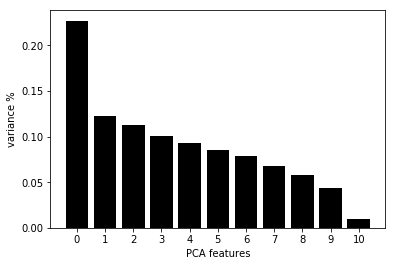

In [31]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

We will choose number of clusters k by elbow method from below graph. We choose here k=5 as inertia( intra group error) doesnot decrease much after k=5

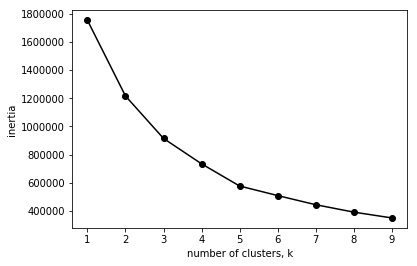

In [32]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

We will perform K means clustering on principle components dataframe. We keep k=5

In [39]:
##reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(n_clusters=5) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(PCA_components)
y_kmeans = kmeans.predict(PCA_components)


Visualizing the cluster in below plot. Here, x and y axes are two main principle components.

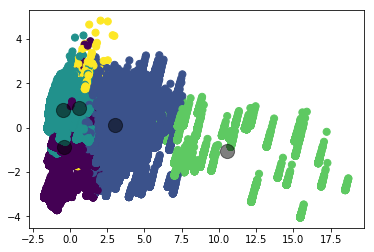

In [40]:
plt.scatter(PCA_components.iloc[:, 0], PCA_components.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);